<style>
	p {
		background-color: grey;
		color: white;
		border: 3px solid grey

	}
	H2 {
		-- background-color: grey;
		color: Grey;
		border: 5px solid White;
		padding : 10px 5px;

	}
</style>


## Ipython-SQL

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///sample.db


'Connected: @sample.db'

In [3]:
%%sql 
create table student (
        sid smallint constraint const_student_pk PRIMARY KEY,
        sname char(20) NULL,
        major varchar(30) NULL,
        gradelevel char(2)
        constraint const_student_gr check ( gradelevel in ('GR', 'SO', 'GR', 'SN', 'JR', 'FR')),
        Age smallint NULL
        constraint const_student_age check ( age > 0 )
) ;


create table class (
        cname char(5),
        time varchar(7),
        room char(5),
        constraint const_class_pk primary key (cname)
        );

create table enrollment (
        studentnumber smallint,
        classname char(5),
        positionnumber smallint,
        constraint const_enroll_pk primary key (studentnumber, classname),
        constraint const_enroll_fk_snum foreign key (studentnumber) references student(sid),
        constraint const_enroll_fk_cname foreign key (classname) references class(cname)
);


insert into student values ( 100, 'JONES', 'HISTORY', 'GR', 21);
insert into student values ( 150, 'PARKS', 'ACCOUNTING', 'SO', 19);
insert into student values ( 200, 'BAKER', 'MATH', 'GR', 50);
insert into student values ( 250, 'GLASS', 'HISTORY', 'SN', 50);
insert into student values ( 300, 'BAKER', 'ACCOUNTING', 'SN', 41);
insert into student values ( 350, 'RUSSEL', 'MATH', 'JR', 20);
insert into student values ( 400, 'RYE', 'ACCOUNTING', 'FR', 18);
insert into student values ( 450, 'JONES', 'HISTORY', 'SN', 24);

insert into class values ( 'BA200', 'M-F9', 'SC110');
insert into class values ( 'BD445', 'MWF3', 'SC213');
insert into class values ( 'BF410', 'MWF8', 'SC213');
insert into class values ( 'CS150', 'MWF3', 'EA304');
insert into class values ( 'CS250', 'MWF12', 'EB210');

insert into enrollment values (100, 'BD445', 1);
insert into enrollment values (150, 'BA200', 1);
insert into enrollment values (200, 'BD445', 2);
insert into enrollment values (200, 'CS250', 1);
insert into enrollment values (300, 'CS150', 1);
insert into enrollment values (400, 'BA200', 2);
insert into enrollment values (400, 'BF410', 1);
insert into enrollment values (400, 'CS250', 2);
insert into enrollment values (450, 'BA200', 3);


 * sqlite:///sample.db
Done.
Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [4]:
%sql select * from student;

 * sqlite:///sample.db
Done.


sid,sname,major,gradelevel,Age
100,JONES,HISTORY,GR,21
150,PARKS,ACCOUNTING,SO,19
200,BAKER,MATH,GR,50
250,GLASS,HISTORY,SN,50
300,BAKER,ACCOUNTING,SN,41
350,RUSSEL,MATH,JR,20
400,RYE,ACCOUNTING,FR,18
450,JONES,HISTORY,SN,24


In [5]:
result = _

In [7]:
result

sid,sname,major,gradelevel,Age
100,JONES,HISTORY,GR,21
150,PARKS,ACCOUNTING,SO,19
200,BAKER,MATH,GR,50
250,GLASS,HISTORY,SN,50
300,BAKER,ACCOUNTING,SN,41
350,RUSSEL,MATH,JR,20
400,RYE,ACCOUNTING,FR,18
450,JONES,HISTORY,SN,24


In [8]:
result?

Type:        ResultSet
String form:
+-----+--------+------------+------------+-----+
           | sid | sname  |   major    | gradelevel | Age | <...> | 450 | JONES  |  HISTORY   |     SN     |  24 |
           +-----+--------+------------+------------+-----+
Length:      8
File:        ~/opt/anaconda3/lib/python3.9/site-packages/sql/run.py
Docstring:  
Results of a SQL query.

Can access rows listwise, or by string value of leftmost column.


In [10]:
%%sql
select * from student;
select * from class;


 * sqlite:///sample.db
Done.
Done.


cname,time,room
BA200,M-F9,SC110
BD445,MWF3,SC213
BF410,MWF8,SC213
CS150,MWF3,EA304
CS250,MWF12,EB210


In [11]:
result = %sql select * from student;


 * sqlite:///sample.db
Done.


In [12]:
print (result)

+-----+--------+------------+------------+-----+
| sid | sname  |   major    | gradelevel | Age |
+-----+--------+------------+------------+-----+
| 100 | JONES  |  HISTORY   |     GR     |  21 |
| 150 | PARKS  | ACCOUNTING |     SO     |  19 |
| 200 | BAKER  |    MATH    |     GR     |  50 |
| 250 | GLASS  |  HISTORY   |     SN     |  50 |
| 300 | BAKER  | ACCOUNTING |     SN     |  41 |
| 350 | RUSSEL |    MATH    |     JR     |  20 |
| 400 |  RYE   | ACCOUNTING |     FR     |  18 |
| 450 | JONES  |  HISTORY   |     SN     |  24 |
+-----+--------+------------+------------+-----+


In [16]:
%%sql 
studentsResult << select sname, major
		 from student 
		 where Age > 40;


 * sqlite:///sample.db
Done.
Returning data to local variable studentsResult


In [17]:
print (studentsResult)

+-------+------------+
| sname |   major    |
+-------+------------+
| BAKER |    MATH    |
| GLASS |  HISTORY   |
| BAKER | ACCOUNTING |
+-------+------------+


### Bind Variable

In [23]:
name = 'BAKER'

In [25]:
%%sql
	select 	* 
	from 	student
	where 	sname = :name;

 * sqlite:///sample.db
Done.


sid,sname,major,gradelevel,Age
200,BAKER,MATH,GR,50
300,BAKER,ACCOUNTING,SN,41


### Matplotlib

 * sqlite:///sample.db
Done.


<BarContainer object of 8 artists>

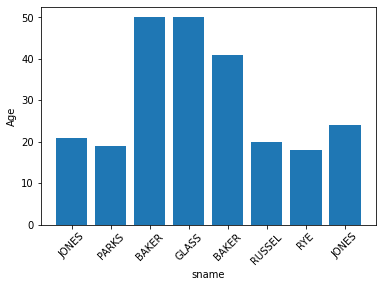

In [26]:
result = %sql  select sname, age from student;

result.bar()

### Dumping output to CSV file

In [40]:
result = %sql select * from student

 * sqlite:///sample.db
Done.


In [29]:
result.csv(filename='result.csv')

CSV results at /Volumes/GoogleDrive/My Drive/LPC/CS07/SQLite/result.csv

<style>
	p {
		background-color: grey;
		color: white;
		border: 3px solid grey

	}
	H2 {
		-- background-color: grey;
		color: Grey;
		border: 5px solid White;
		padding : 10px 5px;

	}
</style>
<h2> DB-API 2.0 interface for SQLite databases </h2>

In [30]:
import sqlite3
con = sqlite3.connect('sample.db')

In [31]:
csr = con.cursor()

In [33]:
sql_stmt = 'select * from student'
csr.execute(sql_stmt)

In [34]:
res = csr.fetchone()
res?

Type:        tuple
String form: (100, 'JONES', 'HISTORY', 'GR', 21)
Length:      5
Docstring:  
Built-in immutable sequence.

If no argument is given, the constructor returns an empty tuple.
If iterable is specified the tuple is initialized from iterable's items.

If the argument is a tuple, the return value is the same object.


In [35]:
res = csr.fetchall()
res?

Type:        list
String form: [(150, 'PARKS', 'ACCOUNTING', 'SO', 19), (200, 'BAKER', 'MATH', 'GR', 50), (250, 'GLASS', 'HISTOR <...> L', 'MATH', 'JR', 20), (400, 'RYE', 'ACCOUNTING', 'FR', 18), (450, 'JONES', 'HISTORY', 'SN', 24)]
Length:      7
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [38]:
for ID, name, *others in res:
	print (ID, name)

150 PARKS
200 BAKER
250 GLASS
300 BAKER
350 RUSSEL
400 RYE
450 JONES


In [37]:
print (res[len(res)-1])

(450, 'JONES', 'HISTORY', 'SN', 24)


<style>
	p {
		background-color: grey;
		color: white;
		border: 3px solid grey

	}
	H2 {
		-- background-color: grey;
		color: Grey;
		border: 5px solid White;
		padding : 10px 5px;

	}
</style>
<h2> SQL Results to Data Frame</h2>


In [42]:
res = %sql select * from student
df = res.DataFrame()

 * sqlite:///sample.db
Done.


In [43]:
df

,sid,sname,major,gradelevel,Age
0,100,JONES,HISTORY,GR,21
1,150,PARKS,ACCOUNTING,SO,19
2,200,BAKER,MATH,GR,50
3,250,GLASS,HISTORY,SN,50
4,300,BAKER,ACCOUNTING,SN,41
5,350,RUSSEL,MATH,JR,20
6,400,RYE,ACCOUNTING,FR,18
7,450,JONES,HISTORY,SN,24


In [44]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [45]:
df.columns

Index(['sid', 'sname', 'major', 'gradelevel', 'Age'], dtype='object')

In [46]:
df.describe()

,sid,Age
count,8.000000,8.000000
mean,275.000000,30.375000
std,122.474487,14.151603
min,100.000000,18.000000
25%,187.500000,19.750000
50%,275.000000,22.500000
75%,362.500000,43.250000
max,450.000000,50.000000


In [47]:
df.loc[1:3]

,sid,sname,major,gradelevel,Age
1,150,PARKS,ACCOUNTING,SO,19
2,200,BAKER,MATH,GR,50
3,250,GLASS,HISTORY,SN,50


In [49]:
df.loc[1:3][df.sid > 150]

/var/folders/jp/bdngjdps7gvd_x1br52t2pfc0000gn/T/ipykernel_16574/4250520582.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[1:3][df.sid > 150]


,sid,sname,major,gradelevel,Age
2,200,BAKER,MATH,GR,50
3,250,GLASS,HISTORY,SN,50


### Sorting Data

In [53]:
df

,sid,sname,major,gradelevel,Age
0,100,JONES,HISTORY,GR,21
1,150,PARKS,ACCOUNTING,SO,19
2,200,BAKER,MATH,GR,50
3,250,GLASS,HISTORY,SN,50
4,300,BAKER,ACCOUNTING,SN,41
5,350,RUSSEL,MATH,JR,20
6,400,RYE,ACCOUNTING,FR,18
7,450,JONES,HISTORY,SN,24


In [59]:
df.sort_index(axis=0, ascending=False)

,sid,sname,major,gradelevel,Age
7,450,JONES,HISTORY,SN,24
6,400,RYE,ACCOUNTING,FR,18
5,350,RUSSEL,MATH,JR,20
4,300,BAKER,ACCOUNTING,SN,41
3,250,GLASS,HISTORY,SN,50
2,200,BAKER,MATH,GR,50
1,150,PARKS,ACCOUNTING,SO,19
0,100,JONES,HISTORY,GR,21


In [60]:
df.sort_values(by='major')

,sid,sname,major,gradelevel,Age
1,150,PARKS,ACCOUNTING,SO,19
4,300,BAKER,ACCOUNTING,SN,41
6,400,RYE,ACCOUNTING,FR,18
0,100,JONES,HISTORY,GR,21
3,250,GLASS,HISTORY,SN,50
7,450,JONES,HISTORY,SN,24
2,200,BAKER,MATH,GR,50
5,350,RUSSEL,MATH,JR,20
